In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from crabnet.crabnet_ import CrabNet

In [3]:
import numpy as np
from pymatgen.core import Composition
from sklearn.model_selection import train_test_split

from gptchem.data import get_hea_phase_data

In [4]:
data = get_hea_phase_data()

In [5]:
data

,Alloy,Phase,phase_encoded,phase_binary_encoded
0,Ag0.05Zr0.95,bcc,1,1
1,Al0.15Cr0.85,bcc,1,1
2,Al0.1Fe0.9,bcc,1,1
3,Al0.1Hf0.9,bcc,1,1
4,Al0.1Ti0.9,bcc,1,1
...,...,...,...,...
1247,SrY,multi-phase,0,0
1248,TaTb,multi-phase,0,0
1249,TaTl,multi-phase,0,0
1250,TaTm,multi-phase,0,0


In [6]:
def try_except_nan(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except:
        return np.nan

In [7]:
def comp_to_str(x):
    return str(Composition(x).reduced_formula)

In [8]:
data["formula"] = data["Alloy"].map(lambda x: try_except_nan(comp_to_str, x))
data["target"] = data["phase_binary_encoded"]

In [9]:
data.dropna(inplace=True)

In [10]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
cb = CrabNet(mat_prop="phase_binary_encoded", classification=True)


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu


In [12]:
cb.classification = True

Model size: 11987206 parameters



Generating EDM: 100%|██████████| 800/800 [00:00<00:00, 206768.75formulae/s]


loading data with up to 9 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 200/200 [00:00<00:00, 352166.58formulae/s]

loading data with up to 9 elements in the formula
stepping every 70 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Using BCE loss for classification task


Epoch: 0/300 --- train auc: 0.885 val auc: 0.854


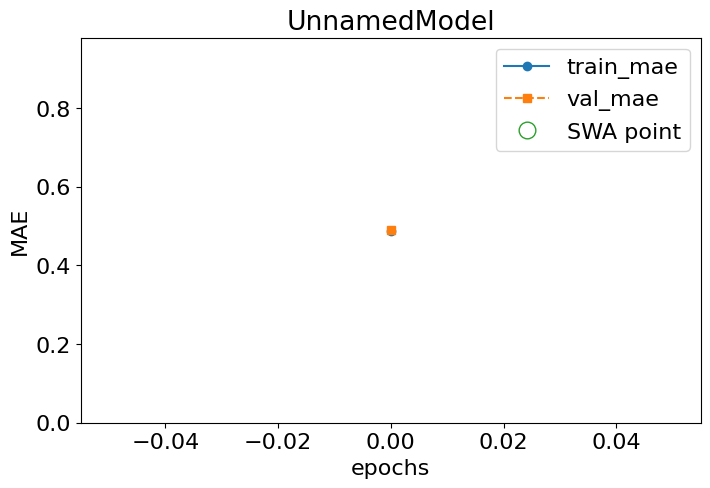

Epoch: 19/300 --- train auc: 0.975 val auc: 0.954


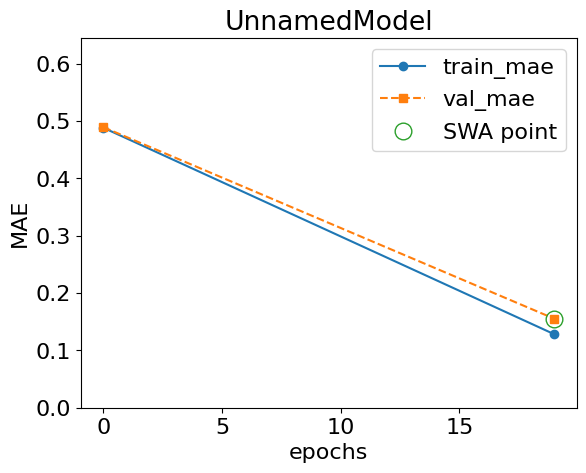

Epoch: 39/300 --- train auc: 0.995 val auc: 0.959


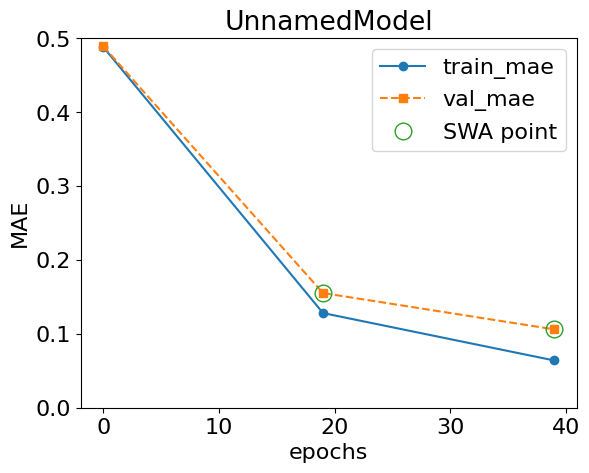

Epoch: 59/300 --- train auc: 1.000 val auc: 0.962


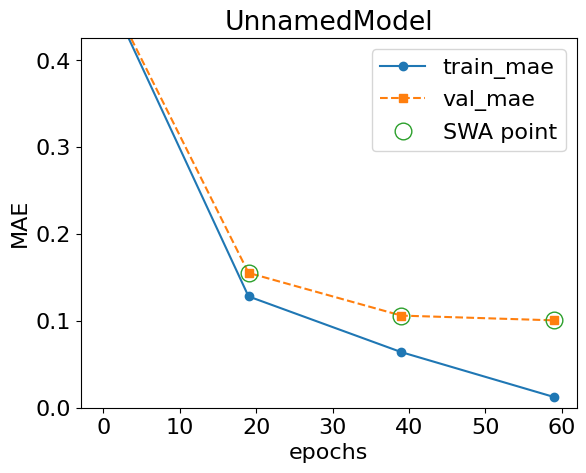

Epoch: 79/300 --- train auc: 1.000 val auc: 0.959


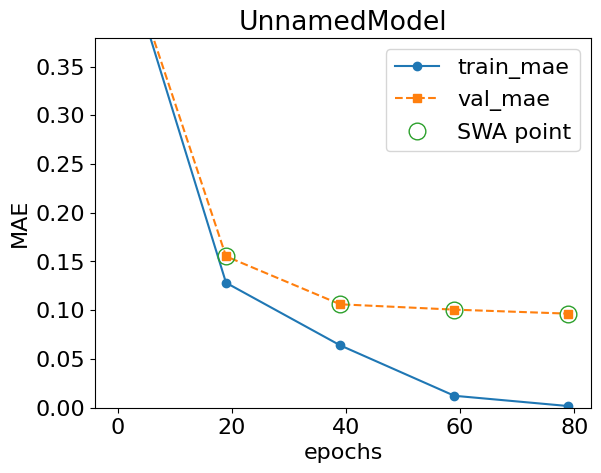

Epoch: 99/300 --- train auc: 1.000 val auc: 0.952


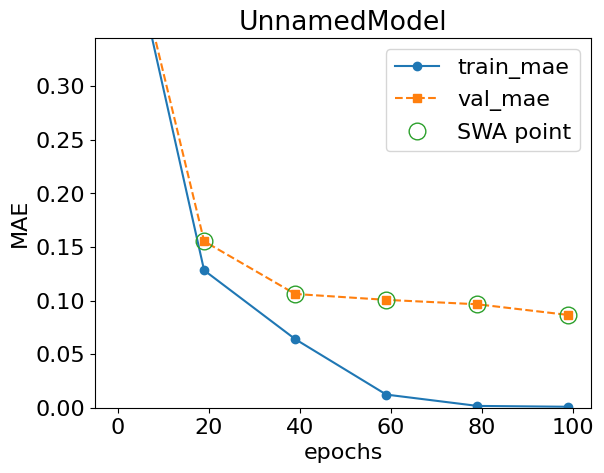

Epoch: 119/300 --- train auc: 1.000 val auc: 0.957


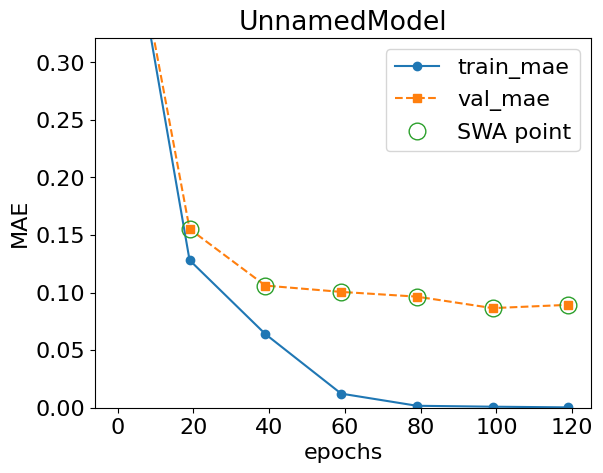

Epoch: 139/300 --- train auc: 1.000 val auc: 0.971


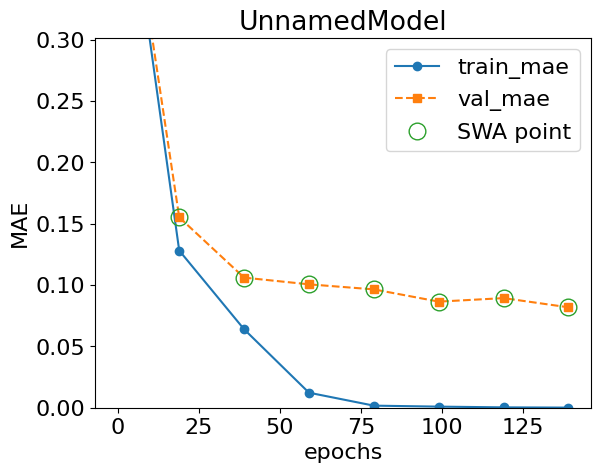

Epoch: 159/300 --- train auc: 1.000 val auc: 0.972


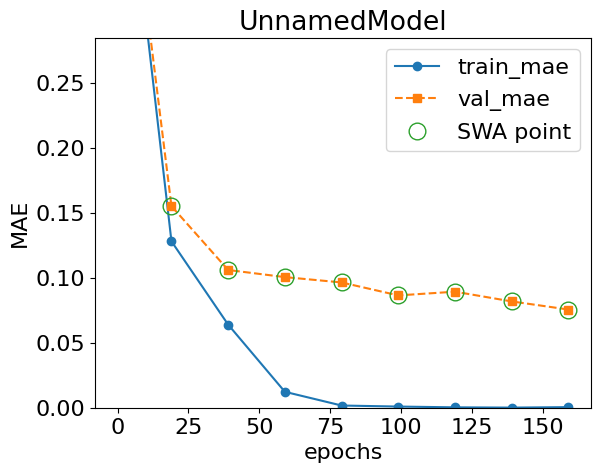

Epoch: 179/300 --- train auc: 1.000 val auc: 0.978


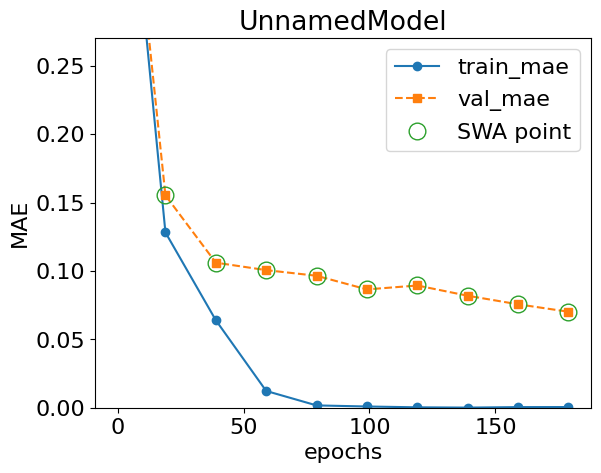

Epoch: 199/300 --- train auc: 1.000 val auc: 0.957


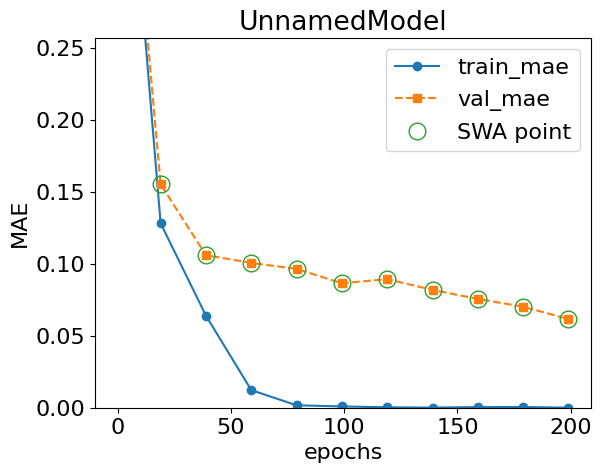

Epoch 219 failed to improve.
Discarded: 1/3 weight updates
Epoch: 219/300 --- train auc: 1.000 val auc: 0.962


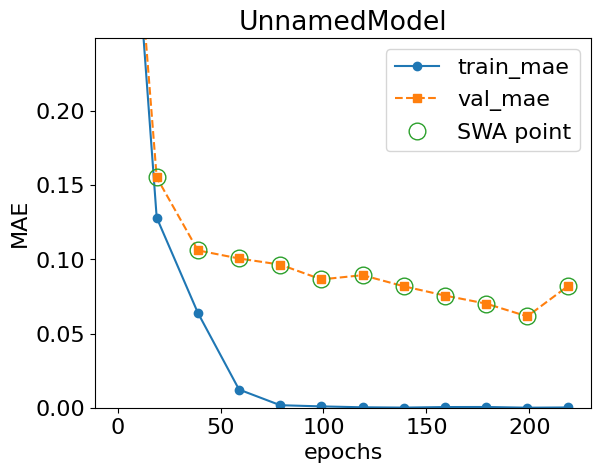

Epoch 239 failed to improve.
Discarded: 2/3 weight updates
Epoch: 239/300 --- train auc: 1.000 val auc: 0.946


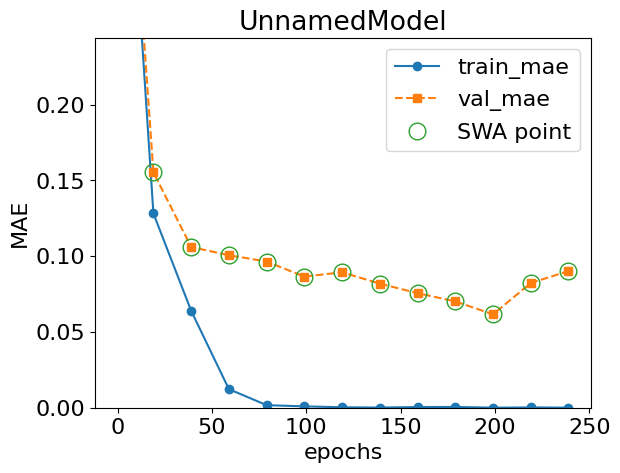

Epoch 259 failed to improve.
Discarded: 3/3 weight updates
Epoch: 259/300 --- train auc: 1.000 val auc: 0.966


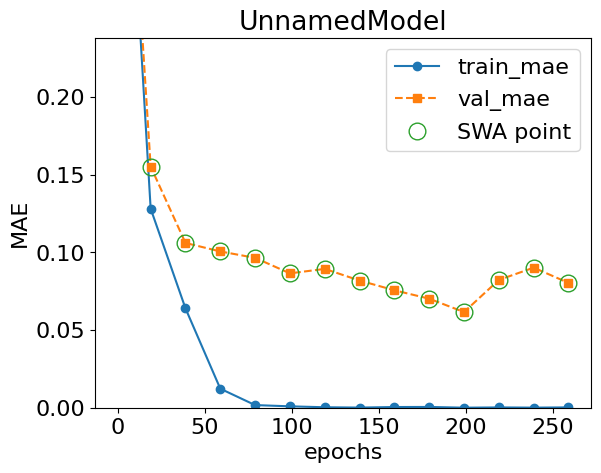

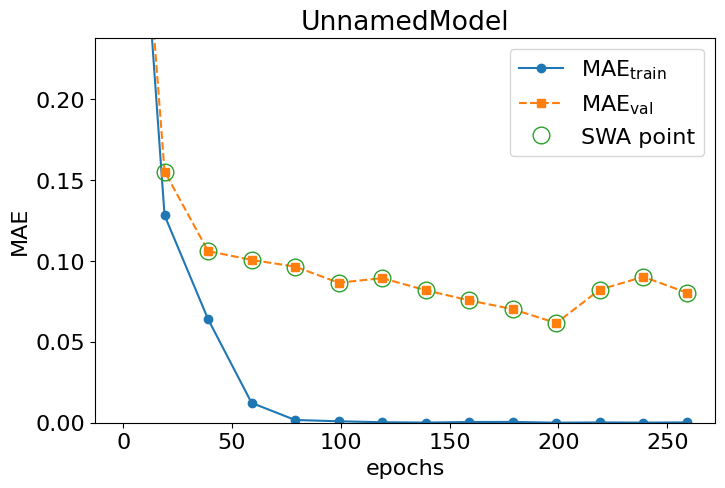

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


In [13]:
cb.fit(train_data)

In [16]:
cb.classification

True

In [20]:
(cb.predict(train_data) > 0.5).astype(int)

Generating EDM: 100%|██████████| 1000/1000 [00:00<00:00, 346608.05formulae/s]


loading data with up to 9 elements in the formula


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,